# Post Hoc Analysis After 11/5/23

In [1]:
import joblib
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import time
from tkinter import *
import tkinter as tk
from tkinter import filedialog
from tqdm import tqdm
from tqdm import notebook
import itertools
import math
import seaborn as sns
import statistics 
from collections import OrderedDict
import csv
import re

In [2]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True, title='load posthoc-predictions.npy')

%gui tk

In [3]:
infiles

('/Users/kaycei/K on Server (NoMachine)/KayCei/Naturalistic Closed Loop/2nd Cohort/AD16-D2/Videos/022624- Locomotion/predictions_5_behav.npy',)

In [4]:
Random_List = [] #creates a array known as random list 
for f in range(len(infiles)):
    arr = np.load(infiles[f])
    Random_List.extend(arr) 
print(Random_List)

[5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 2.0, 2.0, 2.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.0, 5.0, 5.0, 3.0, 0.0, 0.0, 0.0, 5.0, 5.0, 0.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.0, 5.0, 5.0, 5.0, 1.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, 5.0, 5.0, 5.0, 0.0, 0.0, 0.0, 5.0, 5.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 2.0, 2.0, 2.0,

# Total Time of Video in deciseconds

In [5]:
duration_in_deciseconds = len(Random_List)
duration_in_minutes = duration_in_deciseconds / 600
duration_in_frames = duration_in_deciseconds * 3

print('This video is', duration_in_deciseconds, 'deciseconds, which is', duration_in_minutes, 'minutes, which is', duration_in_frames, 'frames')
print(Random_List)

This video is 40945 deciseconds, which is 68.24166666666666 minutes, which is 122835 frames
[5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 2.0, 2.0, 2.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.0, 5.0, 5.0, 3.0, 0.0, 0.0, 0.0, 5.0, 5.0, 0.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.0, 5.0, 5.0, 5.0, 1.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, 5.0, 5.0, 5.0, 0.0, 0.0, 0.0, 5.0, 5.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.

## Creating Array

## Time Integration (deciseconds) 

In [6]:
BehaviorTime = []

for index, value in enumerate(Random_List):
    BehaviorTime.append((value, index))

In [7]:
print(BehaviorTime)

[(5.0, 0), (0.0, 1), (0.0, 2), (0.0, 3), (0.0, 4), (0.0, 5), (5.0, 6), (5.0, 7), (5.0, 8), (5.0, 9), (5.0, 10), (5.0, 11), (5.0, 12), (5.0, 13), (5.0, 14), (5.0, 15), (5.0, 16), (5.0, 17), (5.0, 18), (5.0, 19), (5.0, 20), (5.0, 21), (5.0, 22), (5.0, 23), (5.0, 24), (5.0, 25), (5.0, 26), (5.0, 27), (5.0, 28), (5.0, 29), (5.0, 30), (0.0, 31), (0.0, 32), (0.0, 33), (0.0, 34), (0.0, 35), (0.0, 36), (2.0, 37), (2.0, 38), (2.0, 39), (2.0, 40), (2.0, 41), (2.0, 42), (2.0, 43), (2.0, 44), (1.0, 45), (5.0, 46), (5.0, 47), (5.0, 48), (5.0, 49), (5.0, 50), (5.0, 51), (5.0, 52), (2.0, 53), (2.0, 54), (2.0, 55), (2.0, 56), (5.0, 57), (5.0, 58), (5.0, 59), (5.0, 60), (5.0, 61), (5.0, 62), (5.0, 63), (5.0, 64), (5.0, 65), (5.0, 66), (5.0, 67), (5.0, 68), (5.0, 69), (5.0, 70), (5.0, 71), (5.0, 72), (5.0, 73), (5.0, 74), (0.0, 75), (0.0, 76), (2.0, 77), (2.0, 78), (2.0, 79), (2.0, 80), (2.0, 81), (2.0, 82), (2.0, 83), (2.0, 84), (2.0, 85), (2.0, 86), (2.0, 87), (2.0, 88), (5.0, 89), (5.0, 90), (5.0, 91

### Ensures you only analyze expected length of  Session 


length_of_session = (int(input("How long was the session in minutes?"))) * 600
print(length_of_session)
BehaviorTime = BehaviorTime[:(length_of_session+1)]

#### Removes all info after selected end time 

In [8]:
print('This video is ', len(BehaviorTime), ' deciseconds, which is', (len(BehaviorTime)/600), 'minutes' )
print()
print(BehaviorTime)

This video is  40945  deciseconds, which is 68.24166666666666 minutes

[(5.0, 0), (0.0, 1), (0.0, 2), (0.0, 3), (0.0, 4), (0.0, 5), (5.0, 6), (5.0, 7), (5.0, 8), (5.0, 9), (5.0, 10), (5.0, 11), (5.0, 12), (5.0, 13), (5.0, 14), (5.0, 15), (5.0, 16), (5.0, 17), (5.0, 18), (5.0, 19), (5.0, 20), (5.0, 21), (5.0, 22), (5.0, 23), (5.0, 24), (5.0, 25), (5.0, 26), (5.0, 27), (5.0, 28), (5.0, 29), (5.0, 30), (0.0, 31), (0.0, 32), (0.0, 33), (0.0, 34), (0.0, 35), (0.0, 36), (2.0, 37), (2.0, 38), (2.0, 39), (2.0, 40), (2.0, 41), (2.0, 42), (2.0, 43), (2.0, 44), (1.0, 45), (5.0, 46), (5.0, 47), (5.0, 48), (5.0, 49), (5.0, 50), (5.0, 51), (5.0, 52), (2.0, 53), (2.0, 54), (2.0, 55), (2.0, 56), (5.0, 57), (5.0, 58), (5.0, 59), (5.0, 60), (5.0, 61), (5.0, 62), (5.0, 63), (5.0, 64), (5.0, 65), (5.0, 66), (5.0, 67), (5.0, 68), (5.0, 69), (5.0, 70), (5.0, 71), (5.0, 72), (5.0, 73), (5.0, 74), (0.0, 75), (0.0, 76), (2.0, 77), (2.0, 78), (2.0, 79), (2.0, 80), (2.0, 81), (2.0, 82), (2.0, 83), (2.0, 84), (2.

## Adds Stim Count and Frame Rate to Array 

In [9]:
for z in BehaviorTime:
    behavior = z[0]
    time= z[1]
behavior_type_and_duration = []
current_behavior = BehaviorTime[0][0]
current_time = BehaviorTime[0][1]  
duration = 0
stim_count=0
frames = 0

for behavior, time in BehaviorTime:
    if behavior == current_behavior:
        duration += 1
        if duration == 1:
            start_time= current_time
    else:
        if duration==1:
            end_time=start_time+1
        else:
            end_time= start_time + duration
        frames= duration*3
        stim_count= round(duration/3)
        behavior_type_and_duration.append((current_behavior, duration,frames,stim_count,start_time, end_time))
        current_behavior = behavior
        current_time = time
        start_time= time
        duration = 1
        end_time= time+1
        
# Append the final (current_behavior, current_time, count) tuple outside the loop
behavior_type_and_duration.append((current_behavior, duration, frames, stim_count, start_time, end_time))

# Make a copy of the original behavior_type_and_duration list
behaviortdt= list(behavior_type_and_duration)

In [10]:
print(behaviortdt)
#print(len(behaviortdt))

[(5.0, 1, 3, 0, 0, 1), (0.0, 5, 15, 2, 1, 6), (5.0, 25, 75, 8, 6, 31), (0.0, 6, 18, 2, 31, 37), (2.0, 8, 24, 3, 37, 45), (1.0, 1, 3, 0, 45, 46), (5.0, 7, 21, 2, 46, 53), (2.0, 4, 12, 1, 53, 57), (5.0, 18, 54, 6, 57, 75), (0.0, 2, 6, 1, 75, 77), (2.0, 12, 36, 4, 77, 89), (5.0, 3, 9, 1, 89, 92), (3.0, 1, 3, 0, 92, 93), (0.0, 3, 9, 1, 93, 96), (5.0, 2, 6, 1, 96, 98), (0.0, 1, 3, 0, 98, 99), (2.0, 1, 3, 0, 99, 100), (5.0, 9, 27, 3, 100, 109), (3.0, 2, 6, 1, 109, 111), (5.0, 12, 36, 4, 111, 123), (0.0, 1, 3, 0, 123, 124), (2.0, 7, 21, 2, 124, 131), (5.0, 4, 12, 1, 131, 135), (1.0, 1, 3, 0, 135, 136), (2.0, 1, 3, 0, 136, 137), (5.0, 5, 15, 2, 137, 142), (0.0, 1, 3, 0, 142, 143), (5.0, 3, 9, 1, 143, 146), (0.0, 3, 9, 1, 146, 149), (5.0, 2, 6, 1, 149, 151), (0.0, 2, 6, 1, 151, 153), (2.0, 12, 36, 4, 153, 165), (5.0, 6, 18, 2, 165, 171), (0.0, 3, 9, 1, 171, 174), (2.0, 13, 39, 4, 174, 187), (5.0, 10, 30, 3, 187, 197), (2.0, 16, 48, 5, 197, 213), (5.0, 70, 210, 23, 213, 283), (1.0, 1, 3, 0, 283,

In [11]:
#length_of_session = (int(input("How long was the session in minutes?"))) * 600 
#print(length_of_session) 
behaviortdt = [tup for tup in behaviortdt if tup[4] <= 39000]

In [12]:
print('This video is ', behaviortdt[-1][-1], ' deciseconds, which is', (behaviortdt[-1][-1]/600), 'minutes' )
print()
print(behaviortdt)

This video is  39007  deciseconds, which is 65.01166666666667 minutes

[(5.0, 1, 3, 0, 0, 1), (0.0, 5, 15, 2, 1, 6), (5.0, 25, 75, 8, 6, 31), (0.0, 6, 18, 2, 31, 37), (2.0, 8, 24, 3, 37, 45), (1.0, 1, 3, 0, 45, 46), (5.0, 7, 21, 2, 46, 53), (2.0, 4, 12, 1, 53, 57), (5.0, 18, 54, 6, 57, 75), (0.0, 2, 6, 1, 75, 77), (2.0, 12, 36, 4, 77, 89), (5.0, 3, 9, 1, 89, 92), (3.0, 1, 3, 0, 92, 93), (0.0, 3, 9, 1, 93, 96), (5.0, 2, 6, 1, 96, 98), (0.0, 1, 3, 0, 98, 99), (2.0, 1, 3, 0, 99, 100), (5.0, 9, 27, 3, 100, 109), (3.0, 2, 6, 1, 109, 111), (5.0, 12, 36, 4, 111, 123), (0.0, 1, 3, 0, 123, 124), (2.0, 7, 21, 2, 124, 131), (5.0, 4, 12, 1, 131, 135), (1.0, 1, 3, 0, 135, 136), (2.0, 1, 3, 0, 136, 137), (5.0, 5, 15, 2, 137, 142), (0.0, 1, 3, 0, 142, 143), (5.0, 3, 9, 1, 143, 146), (0.0, 3, 9, 1, 146, 149), (5.0, 2, 6, 1, 149, 151), (0.0, 2, 6, 1, 151, 153), (2.0, 12, 36, 4, 153, 165), (5.0, 6, 18, 2, 165, 171), (0.0, 3, 9, 1, 171, 174), (2.0, 13, 39, 4, 174, 187), (5.0, 10, 30, 3, 187, 197), (2.0, 

## Add Bout Count to the Array 

In [13]:
enumerated_behaviortdt = []
behavior_index = {}  # Dictionary to store behavior and its corresponding index

for behavior, duration, frames, stim_count, start_time, end_time in behaviortdt:
    if behavior not in behavior_index:
        behavior_index[behavior] = 1
    else:
        behavior_index[behavior] += 1
    
    bout = behavior_index[behavior]
    enumerated_behaviortdt.append((behavior,stim_count,frames, bout, duration,start_time,end_time))

print(enumerated_behaviortdt)

[(5.0, 0, 3, 1, 1, 0, 1), (0.0, 2, 15, 1, 5, 1, 6), (5.0, 8, 75, 2, 25, 6, 31), (0.0, 2, 18, 2, 6, 31, 37), (2.0, 3, 24, 1, 8, 37, 45), (1.0, 0, 3, 1, 1, 45, 46), (5.0, 2, 21, 3, 7, 46, 53), (2.0, 1, 12, 2, 4, 53, 57), (5.0, 6, 54, 4, 18, 57, 75), (0.0, 1, 6, 3, 2, 75, 77), (2.0, 4, 36, 3, 12, 77, 89), (5.0, 1, 9, 5, 3, 89, 92), (3.0, 0, 3, 1, 1, 92, 93), (0.0, 1, 9, 4, 3, 93, 96), (5.0, 1, 6, 6, 2, 96, 98), (0.0, 0, 3, 5, 1, 98, 99), (2.0, 0, 3, 4, 1, 99, 100), (5.0, 3, 27, 7, 9, 100, 109), (3.0, 1, 6, 2, 2, 109, 111), (5.0, 4, 36, 8, 12, 111, 123), (0.0, 0, 3, 6, 1, 123, 124), (2.0, 2, 21, 5, 7, 124, 131), (5.0, 1, 12, 9, 4, 131, 135), (1.0, 0, 3, 2, 1, 135, 136), (2.0, 0, 3, 6, 1, 136, 137), (5.0, 2, 15, 10, 5, 137, 142), (0.0, 0, 3, 7, 1, 142, 143), (5.0, 1, 9, 11, 3, 143, 146), (0.0, 1, 9, 8, 3, 146, 149), (5.0, 1, 6, 12, 2, 149, 151), (0.0, 1, 6, 9, 2, 151, 153), (2.0, 4, 36, 7, 12, 153, 165), (5.0, 2, 18, 13, 6, 165, 171), (0.0, 1, 9, 10, 3, 171, 174), (2.0, 4, 39, 8, 13, 174, 1

# Stim Count Calcultaion

In [14]:
#BCBDT = []

# Calculate durations and update BCBDT
#for behavior, duration, frames, bout, start_time, end_time in enumerated_behaviortdt:
    #stim_count = round(duration / 3)
    #if stim_count < 1:
        #stim_count = 0
    #if stim_count > 0:
        #BCBDT.append((behavior, duration, frames, bout, stim_count, start_time, end_time))

# Print the modified BCBDT
#print("Modified BCBDT:", BCBDT)

# Assign enumerated_behaviortdt to BCBDST
BCBDST = enumerated_behaviortdt


In [15]:
behavior_labels = {
    0.0: "Left Turns",
    1.0: "Right Turns",
    2.0: "Locomotion",
    3.0: "Face Groom",
    4.0: "All Other Groom",
    5.0: "All Other",
}

bdbt_dict = {}  # Dictionary to store lists of behaviors

for behavior,stim_count,frames, bout, duration,start_time,end_time in BCBDST:
    behavior_label = behavior_labels.get(behavior, "Unknown Behavior")
    if behavior_label not in bdbt_dict:
        bdbt_dict[behavior_label] = []
    bdbt_dict[behavior_label].append((behavior,stim_count,frames, bout, duration,start_time,end_time))


In [16]:


print(bdbt_dict)

{'All Other': [(5.0, 0, 3, 1, 1, 0, 1), (5.0, 8, 75, 2, 25, 6, 31), (5.0, 2, 21, 3, 7, 46, 53), (5.0, 6, 54, 4, 18, 57, 75), (5.0, 1, 9, 5, 3, 89, 92), (5.0, 1, 6, 6, 2, 96, 98), (5.0, 3, 27, 7, 9, 100, 109), (5.0, 4, 36, 8, 12, 111, 123), (5.0, 1, 12, 9, 4, 131, 135), (5.0, 2, 15, 10, 5, 137, 142), (5.0, 1, 9, 11, 3, 143, 146), (5.0, 1, 6, 12, 2, 149, 151), (5.0, 2, 18, 13, 6, 165, 171), (5.0, 3, 30, 14, 10, 187, 197), (5.0, 23, 210, 15, 70, 213, 283), (5.0, 16, 141, 16, 47, 284, 331), (5.0, 0, 3, 17, 1, 332, 333), (5.0, 2, 21, 18, 7, 335, 342), (5.0, 1, 6, 19, 2, 345, 347), (5.0, 16, 141, 20, 47, 348, 395), (5.0, 3, 27, 21, 9, 397, 406), (5.0, 6, 57, 22, 19, 412, 431), (5.0, 1, 6, 23, 2, 434, 436), (5.0, 6, 54, 24, 18, 451, 469), (5.0, 6, 54, 25, 18, 470, 488), (5.0, 1, 9, 26, 3, 490, 493), (5.0, 1, 12, 27, 4, 508, 512), (5.0, 1, 9, 28, 3, 518, 521), (5.0, 1, 9, 29, 3, 524, 527), (5.0, 0, 3, 30, 1, 528, 529), (5.0, 1, 9, 31, 3, 530, 533), (5.0, 25, 222, 32, 74, 536, 610), (5.0, 9, 84

In [17]:
keys_list = bdbt_dict.keys()
print(keys_list)

dict_keys(['All Other', 'Left Turns', 'Locomotion', 'Right Turns', 'Face Groom', 'All Other Groom'])


In [58]:
face_groom_duration=[]
for key, value in bdbt_dict.items():
    if key=="Face Groom":
        for x in value:
            if x[5]>3000 and x[6]<=21000:
                millisecond_conversion=x[4]*100
                face_groom_duration.append(millisecond_conversion)
   

In [59]:
face_groom_duration

[100,
 500,
 100,
 300,
 200,
 100,
 100,
 100,
 100,
 900,
 100,
 400,
 100,
 300,
 400,
 100,
 100,
 200,
 100,
 100,
 100,
 500,
 100,
 300,
 100,
 200,
 200,
 100,
 100,
 300,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 200,
 100,
 200,
 100,
 100,
 100,
 100,
 200,
 100,
 100,
 600,
 200,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 400,
 100,
 100,
 100,
 200,
 100,
 500,
 200,
 100,
 100,
 700,
 100,
 100,
 100,
 100,
 200,
 100,
 200,
 100,
 100,
 100,
 200,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 600,
 400,
 500,
 200,
 100,
 200,
 200,
 100,
 100,
 200,
 800,
 100,
 300,
 700,
 300,
 100,
 100,
 400,
 300,
 200,
 200,
 600,
 200,
 300,
 100,
 100,
 200,
 200,
 100,
 100,
 100,
 300,
 600,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 200,
 100,
 100,
 100,
 100,
 200,
 100,
 100,
 100,
 200,
 100,
 300,
 100,
 100,
 100,
 200,
 100,
 100,
 300,
 100,
 400,
 100,
 100,
 100,
 200,
 100,
 300,
 200,
 100,
 100,
 100,
 100,
 100,
 100,
 200

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

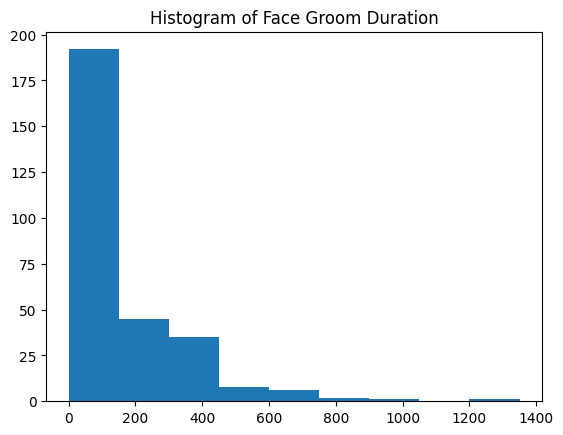

In [83]:

df=pd.DataFrame(face_groom_duration)
bins=list(range(0,1401,150))
plt.hist(df[0], bins=bins, )

plt.title('Histogram of Face Groom Duration')

# Display the histogram
plt.show()


In [66]:
duration_bin

0        (0, 150]
1      (450, 600]
2        (0, 150]
3      (150, 300]
4      (150, 300]
          ...    
285      (0, 150]
286    (150, 300]
287      (0, 150]
288      (0, 150]
289      (0, 150]
Name: 0, Length: 290, dtype: category
Categories (30, interval[int64, right]): [(0, 150] < (150, 300] < (300, 450] < (450, 600] ... (3900, 4050] < (4050, 4200] < (4200, 4350] < (4350, 4500]]

## Stim Count and Average Duration 

In [18]:
from tabulate import tabulate
stimcount_by_key = {}

def round_float(value):
    return round(value, 3)

for key, tuples_list in bdbt_dict.items():
    stimcount = [tuple_item[1] for tuple_item in tuples_list]
    sum_of_stimcount = sum(stimcount)
    stimcount_by_key[key] = sum_of_stimcount

table_data = [(key, round_float(sum_value)) for key, sum_value in stimcount_by_key.items()]
headers = ["Key", "Total Number of Stimulations"]

table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

average_duration_by_key = {}

for key, tuples_list in bdbt_dict.items():
    durations = [tuple_item[4] for tuple_item in tuples_list]
    average_duration = ((sum(durations) / len(durations))/10)
    average_duration_by_key[key] = round_float(average_duration)

table_data = [(key, avg_duration) for key, avg_duration in average_duration_by_key.items()]
headers = ["Key", "Average Duration(seconds)"]

table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

stim_block_stim_count_by_key = {}

for key, tuples_list in bdbt_dict.items():
    sum_of_stimcount = 0
    for tuple_item in tuples_list:
        if tuple_item[5]> 3000 and tuple_item[6] <= 21000:  
            sum_of_stimcount += tuple_item[1]
    stim_block_stim_count_by_key[key] = sum_of_stimcount

table_data = [(key, round_float(sum_value)) for key, sum_value in stim_block_stim_count_by_key.items()]
headers = ["Key", "Total Stimulations during 30-Min Stim Block"]
#for (key, value) in stim_block_stim_count_by_key:
    #print(key)
    #print(value)
table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

average_duration_30min_by_key = {}

for key, tuples_list in bdbt_dict.items():
    total_duration = 0  # Initialize the total duration to 0
    count = 0  # Initialize a count variable to track the number of valid tuples
    
    for tuple_item in tuples_list:
        if tuple_item[5] > 3000 and tuple_item[6] <= 21000:  # Check the conditions
            total_duration += tuple_item[4]  # Add the duration to the total
            count += 1  # Increment the count
            
    if count > 0:
        average_duration = round(((total_duration / count)/10), 2)  # Calculate average and round it
    else:
        average_duration = 0  # Set average to 0 if there are no valid tuples
    
    average_duration_30min_by_key[key] = average_duration

# Printing the results in a tabular format
table_data = [(key, avg_duration) for key, avg_duration in average_duration_30min_by_key.items()]
headers = ["Key", "Average Duration During 30 Min Stim Block (seconds)"]

from tabulate import tabulate

table = tabulate(table_data, headers, tablefmt="pretty")
print(table)




+-----------------+------------------------------+
|       Key       | Total Number of Stimulations |
+-----------------+------------------------------+
|    All Other    |             9814             |
|   Left Turns    |             580              |
|   Locomotion    |             1163             |
|   Right Turns   |             346              |
|   Face Groom    |             394              |
| All Other Groom |              71              |
+-----------------+------------------------------+
+-----------------+---------------------------+
|       Key       | Average Duration(seconds) |
+-----------------+---------------------------+
|    All Other    |           0.884           |
|   Left Turns    |           0.176           |
|   Locomotion    |           0.282           |
|   Right Turns   |           0.171           |
|   Face Groom    |           0.208           |
| All Other Groom |           0.236           |
+-----------------+---------------------------+
+---------

##  Number of Bouts

In [19]:
bout_by_key = {}

for key, tuples_list in bdbt_dict.items():
    bouts = [tuple_item[3] for tuple_item in tuples_list]
    sum_of_bouts = len(bouts)
    bout_by_key[key] = sum_of_bouts

table_data = [(key, sum_value) for key, sum_value in bout_by_key.items()]
headers = ["Key", "Total Bouts"]

table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

stim_block_bout_count_by_key = {}

for key, tuples_list in bdbt_dict.items():
    bout_count = sum(1 for tuple_item in tuples_list if 3000 < tuple_item[5] and tuple_item[6] <= 21000)
    stim_block_bout_count_by_key[key] = bout_count

table_data = [(key, count) for key, count in stim_block_bout_count_by_key.items()]
headers = ["Key", "30 minute Stim Block Bout Count"]

table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

+-----------------+-------------+
|       Key       | Total Bouts |
+-----------------+-------------+
|    All Other    |    3382     |
|   Left Turns    |    1275     |
|   Locomotion    |    1338     |
|   Right Turns   |     762     |
|   Face Groom    |     720     |
| All Other Groom |     118     |
+-----------------+-------------+
+-----------------+---------------------------------+
|       Key       | 30 minute Stim Block Bout Count |
+-----------------+---------------------------------+
|    All Other    |              1522               |
|   Left Turns    |               566               |
|   Locomotion    |               641               |
|   Right Turns   |               352               |
|   Face Groom    |               290               |
| All Other Groom |               54                |
+-----------------+---------------------------------+


## Behavior of Interest

In [1341]:
for file_path in infiles: # if taking from Z Drive 
    folders = (os.path.dirname(file_path)).split('/')
    print(folders)
    print(len(folders))
    if len(folders) >= 4:  # Check if there are at least 4 elements in the list
        folder_name = folders[-1].lower()
        fol = re.split(r'[-\s]+', folder_name)

        if len(fol) >= 2:  # Check if there are at least 2 elements in the 'fol' list
            if fol[1] == 'face':
                # Merge 'face' and 'groom' into a single folder
                fol[1] = 'face groom'
                fol.pop(2)

            print(fol)
            print(len(fol))
        else:
            print("Folder name does not contain at least two elements.")
    else:
        print("Not enough elements in the folders list.")

['', 'Users', 'kaycei', 'K on Server (NoMachine)', 'KayCei', 'Naturalistic Closed Loop', '2nd Cohort', 'AD22-D1', 'Videos', '030624-RT BILATERAL']
10
['030624', 'rt', 'bilateral']
3


In [1342]:
behavior_mapping = {
    0: "Left Turn ",
    1: "Right Turn ",
    2: "Locomotion ",
    3: "Face Groom ",
    4: "All Other Groom ",
    5: "All Other "
}

print("Please select the behavior of interest:")
for key, value in behavior_mapping.items():
    print(f"{key}: {value}")
# Assuming fol[1] contains the behavior label
fol_label = fol[1].lower()  # Convert to lowercase for case-insensitive comparison

# Check if the fol_label is "rt" or "RT" and set behavior_of_interest_1 accordingly
if fol_label == 'rt':
    behavior_of_interest_1 = 1
elif fol_label =='locomotion':
    behavior_of_interest_1 = 2
elif fol_label == 'left turn':
    behavior_of_interest_1=0
elif fol_label=='face groom':
    behavior_of_interest_1=3
elif fol_label== 'all other groom':
    behavior_of_interest_1=4
elif fol_label=='all other':
    behavior_of_interest_1=5
    

behavior_name_2 = behavior_mapping.get(behavior_of_interest_1, "Unknown")

print("Selected behavior of interest:", behavior_name_2)


Please select the behavior of interest:
0: Left Turn 
1: Right Turn 
2: Locomotion 
3: Face Groom 
4: All Other Groom 
5: All Other 
Selected behavior of interest: Right Turn 


## Type of Fiber Connection

In [1343]:
if len(fol)>=3:
    print(len(fol))
    fol_label = fol[2].lower() 
    print(fol_label)
    if fol_label=='bilateral':
        type_of_fiber_connection = 'Bilateral'
    elif fol_label=='contralateral'or fol_label=='contra':
        type_of_fiber_connection = 'Contralateral'
    elif fol_label=='ipsilateral'or fol_label=='ipsi':
        type_of_fiber_connection = 'Ipsilateral'
    else:
        type_of_fiber_connection = 'Bilateral'
else:
    type_of_fiber_connection = 'Bilateral'


#selection = input("Please enter the type of fiber connection for the trial (B for Bilateral, I for Ipsilateral, C for Contralateral): ")


print("Selected type of fiber connection:", type_of_fiber_connection)


3
bilateral
Selected type of fiber connection: Bilateral


## Session Type 

In [1344]:
trial_type = "Stim Session"
sham_session = "n"  # Initialize sham_session to "n" by default

# Check if either "Sham" or 'sham' is in the string 'fol'
if "Sham" in fol or 'sham' in fol:
    sham_session = "y"

# Check if sham_session (converted to lowercase) is "y"
if sham_session.lower() == "y":
    trial_type = "Sham Session"

print(sham_session)
print(trial_type)


n



## Creating CSV

In [1345]:
rounded_dict = {}

for key, value_list in bdbt_dict.items():
    rounded_values = [
        (
            round(v[0]),     # Rounding and converting to integer
            v[1], v[2], v[3], v[4],
            round(v[5], 2),  # Rounding the sixth float value
            round(v[6], 2)   # Rounding the seventh float value
        )
        for v in value_list
    ]
    rounded_dict[key] = rounded_values

#print(rounded_dict)

bdbt_dict=rounded_dict
print(bdbt_dict)

{'All Other': [(5, 2, 15, 1, 5, 0, 5), (5, 3, 27, 2, 9, 8, 17), (5, 8, 69, 3, 23, 18, 41), (5, 2, 15, 4, 5, 42, 47), (5, 2, 21, 5, 7, 48, 55), (5, 0, 3, 6, 1, 57, 58), (5, 3, 24, 7, 8, 61, 69), (5, 1, 6, 8, 2, 75, 77), (5, 3, 30, 9, 10, 78, 88), (5, 2, 18, 10, 6, 89, 95), (5, 3, 30, 11, 10, 96, 106), (5, 2, 15, 12, 5, 107, 112), (5, 5, 48, 13, 16, 113, 129), (5, 2, 18, 14, 6, 130, 136), (5, 15, 132, 15, 44, 137, 181), (5, 1, 12, 16, 4, 182, 186), (5, 20, 183, 17, 61, 189, 250), (5, 0, 3, 18, 1, 254, 255), (5, 0, 3, 19, 1, 256, 257), (5, 1, 9, 20, 3, 261, 264), (5, 1, 6, 21, 2, 265, 267), (5, 3, 24, 22, 8, 269, 277), (5, 0, 3, 23, 1, 286, 287), (5, 1, 9, 24, 3, 296, 299), (5, 1, 6, 25, 2, 300, 302), (5, 1, 6, 26, 2, 304, 306), (5, 2, 18, 27, 6, 307, 313), (5, 14, 126, 28, 42, 314, 356), (5, 8, 72, 29, 24, 357, 381), (5, 2, 15, 30, 5, 382, 387), (5, 2, 15, 31, 5, 389, 394), (5, 4, 36, 32, 12, 396, 408), (5, 1, 6, 33, 2, 410, 412), (5, 5, 48, 34, 16, 413, 429), (5, 1, 6, 35, 2, 441, 443),

In [1346]:
from json import dumps
string_bdbt_dict=dumps(bdbt_dict)

In [1347]:
# Find the start index of the first '{' character
start_index = string_bdbt_dict.index('{')

# Find the end index of the last '}' character
end_index = string_bdbt_dict.rindex('}') + 1

# Extract the dictionary portion of the string
dict_str = string_bdbt_dict[start_index:end_index]

# Find the start indices of key-value pairs using '":'
key_value_end = []
for pos, char in enumerate(dict_str):
    if dict_str[pos:pos+3] == '": ':
        key_value_end.append(pos)
        
#print(key_value_end)      

# Initialize lists to store extracted keys and values
keys = []
values = []
value_ends=[]

# Iterate through the start indices of key-value pairs
for key_value_start in key_value_end:
    # Find the start index of the value by searching for '[[' after the key-value pair
    value_start = dict_str.find('[[', key_value_start) + 1
    
    # Find the end index of the value by searching for ']]' after the value_start
    value_end = dict_str.find(']]', value_start)+ 2
    value_ends.append(value_end)

    # Extract the value using the calculated start and end indices
    value = dict_str[value_start:value_end]
    values.append(value)
    # Extract the key using the portion of the string before the '":'
    if key_value_start == key_value_end[0]:
        key = dict_str[2:key_value_start].strip()
        keys.append(key)
    else:
        key = dict_str[value_ends[-2]+ 3:key_value_start].strip()
        keys.append(key)
        
#print(values)
#print(value_ends)
modified_values = {}  # Initialize an empty dictionary to store modified values

# Iterate through the keys and values
for key, value in zip(keys, values):
    modified_value = value.replace(" ", "").replace("],", "]").replace("]]","]")
    modified_values[key] = modified_value

In [1348]:
import os
import csv

keys_to_write = ["Right Turns", "Left Turns", "Locomotion", "Face Groom", "All Other Groom", "All Other"]

# Create a dictionary to hold cleaned and possibly split values
cleaned_values = {}

# Iterate through the keys and values, cleaning and splitting if needed
for key in keys_to_write:
    value = modified_values[key].strip()
    if len(value) > 32500:
        split_index = value.rfind("]", 0, 32500)  # Find the last "]" before 32500 characters
        if split_index != -1:  # If "]" is found before the limit
            cleaned_values[key] = value[:split_index + 1]  # Include the last "]"
            cleaned_values[f"{key} Continue"] = value[split_index + 1:]  # Continue from after the "]"
        else:
            # If "]" is not found, just store the value as it is
            cleaned_values[key] = value
    else:
        cleaned_values[key] = value

# Format specific values in cleaned_values dictionary
formatted_values = {'"{}"'.format(key): value for key, value in cleaned_values.items()}

    
# Specify the output path for the CSV file
output_path = r"/Users/kaycei/K on Server (NoMachine)/KayCei/Naturalistic Database1.csv"

data_dict = {}
session_numbers = {}

# Iterate through each file in infiles
for file_path in infiles: # if taking from K Drive 
    folders = (os.path.dirname(file_path)).split('/')
    #print(folders)
    # Extract the mouse name from the file path
    mouse_name = folders[7].split('-')[0]
    # Extract the genotype from the file path
    genotype = folders[7].split('-')[1]
    # Extract the date from the file path
    date = folders[-1].split('-')[0]
#for file_path in infiles: # if taking from Z Drive 
    #folders = (os.path.dirname(file_path)).split('/')
    #print(folders)
    # Extract the mouse name from the file path
    #mouse_name = folders[2].split('-')[0]
    # Extract the genotype from the file path
    #genotype = folders[2].split('-')[1]
    # Extract the date from the file path
    #date = folders[-1].split('-')[0]
#for file_path in infiles:   #if taking files from D drive
    #folders = (os.path.dirname(file_path)).split('/')
    #print(folders)
    # Extract the mouse name from the file path
    #mouse_name = folders[6].split('-')[0]
    # Extract the genotype from the file path
    #genotype = folders[6].split('-')[1]
    # Extract the date from the file path
    #date = folders[-1].split('-')[0]    
# Determine the session number for this mouse and stim behavior
    key = (mouse_name, behavior_name_2, type_of_fiber_connection)
    if key not in session_numbers:
        session_numbers[key] = 1
    else:
        session_numbers[key] += 1
    session_number = session_numbers[key]

    # Retrieve the relevant statistics from the dictionaries
    right_turn_bdbt=cleaned_values.get("Right Turns",0)
    right_turn_bout_count = bout_by_key.get("Right Turns", 0)
    right_turn_stim_count = stimcount_by_key.get("Right Turns", 0)
    average_duration_right_turn = average_duration_by_key.get("Right Turns", 0)
    right_turn_bout_30min=stim_block_bout_count_by_key.get("Right Turns", 0)
    right_turn_stim_30min = stim_block_stim_count_by_key.get("Right Turns", 0)
    right_turn_duration_30min=average_duration_30min_by_key.get("Right Turns", 0)
    
    left_turn_bdbt=cleaned_values.get("Left Turns",0)
    left_turn_bout_count = bout_by_key.get("Left Turns", 0)
    left_turn_stim_count = stimcount_by_key.get("Left Turns",0)
    average_duration_left_turn = average_duration_by_key.get("Left Turns",0)
    left_turn_bout_30min=stim_block_bout_count_by_key.get("Left Turns",0)
    left_turn_stim_30min = stim_block_stim_count_by_key.get("Left Turns",0)
    left_turn_duration_30min=average_duration_30min_by_key.get("Left Turns",0)
    
    loc_bdbt = cleaned_values.get("Locomotion",0)
    loc_bout_count = bout_by_key.get("Locomotion", 0)
    loc_stim_count = stimcount_by_key.get("Locomotion",0)
    average_duration_loc = average_duration_by_key.get("Locomotion",0)
    loc_stim_30min = stim_block_stim_count_by_key.get("Locomotion",0)
    loc_bout_30min=stim_block_bout_count_by_key.get("Locomotion",0)
    loc_duration_30min=average_duration_30min_by_key.get("Locomotion",0)
    
    face_groom_bdbt = cleaned_values.get("Face Groom",0)
    face_groom_bout_count = bout_by_key.get("Face Groom", 0)
    face_groom_stim_count = stimcount_by_key.get("Face Groom", 0)
    average_duration_face_groom =average_duration_by_key.get("Face Groom", 0)
    face_groom_bout_30min=stim_block_bout_count_by_key.get("Face Groom", 0)
    face_groom_stim_30min = stim_block_stim_count_by_key.get("Face Groom", 0)
    face_groom_duration_30min=average_duration_30min_by_key.get("Face Groom", 0)
    
    aog_bdbt = cleaned_values.get("All Other Groom",0)
    aog_bout_count = bout_by_key.get("All Other Groom",0)
    aog_stim_count = stimcount_by_key.get("All Other Groom",0)
    average_duration_aog =average_duration_by_key.get("All Other Groom",0)
    aog_bout_30min=stim_block_bout_count_by_key.get("All Other Groom",0)
    aog_stim_30min = stim_block_stim_count_by_key.get("All Other Groom",0)
    aog_duration_30min=average_duration_30min_by_key.get("All Other Groom",0)
    
    ao_bdbt = cleaned_values.get("All Other",0)
    ao_bout_count = bout_by_key.get("All Other",0)
    ao_stim_count = stimcount_by_key.get("All Other",0)
    average_duration_ao =average_duration_by_key.get("All Other",0)
    ao_bout_30min=stim_block_bout_count_by_key.get("All Other",0)
    ao_stim_30min = stim_block_stim_count_by_key.get("All Other",0)
    ao_duration_30min=average_duration_30min_by_key.get("All Other",0)
    
    
    
    
    # Apply cleaning and splitting logic to the arrays
    cleaned_right_turn_bdbt = right_turn_bdbt.strip()
    cleaned_left_turn_bdbt = left_turn_bdbt.strip()
    cleaned_loc_bdbt = loc_bdbt.strip()
    cleaned_face_groom_bdbt = face_groom_bdbt.strip()
    cleaned_aog_bdbt = aog_bdbt.strip()
    cleaned_ao_bdbt = ao_bdbt.strip()
    rt_array_cont=cleaned_values.get("Right Turns Continue",0)
    lt_array_cont=cleaned_values.get("Left Turns Continue",0)
    loc_cont=cleaned_values.get("Locomotion Continue",0)
    fg_cont=cleaned_values.get("Face Groom Continue",0)
    aog_cont=cleaned_values.get("All Other Groom Continue",0)
    ao_cont=cleaned_values.get("All Other Continue",0)
    mouse_data = {
        "Mouse": mouse_name,
        "Genotype": genotype,
        "Date": date,
        "Selected Behavior": behavior_name_2,
        "Sham": sham_session,  
        "Session Number": session_number,
        "Fiber Connection": type_of_fiber_connection,
        "Right Turn Array": cleaned_right_turn_bdbt,
        "Right Turn Array Continue":rt_array_cont,
        "Total Right Turn Bout Count": right_turn_bout_count,
        "Total Right Turn Stim Count": right_turn_stim_count,
        "Average Duration of Right Turn(seconds)": average_duration_right_turn,
        "Total Right Turn Stim in Stim Block": right_turn_stim_30min,
        "Total Right Turn Bouts in Stim Block":right_turn_bout_30min,
        "Right Turn Average Duration in Stim Block(seconds)":right_turn_duration_30min,
        "Left Turn Array": cleaned_left_turn_bdbt,
        "Left Turn Array Continue":lt_array_cont,
        "Total Left Turn Bout Count": left_turn_bout_count,
        "Total Left Turn Stim Count": left_turn_stim_count,
        "Average Duration of Left Turn(seconds)": average_duration_left_turn,
        "Total Left Turn Stim in Stim Block": left_turn_stim_30min,
        "Total Left Turn Bouts in Stim Block":left_turn_bout_30min,
        "Left Turn Average Duration in Stim Block(seconds)":left_turn_duration_30min,
        "Locomotion Array": cleaned_loc_bdbt,
        "Locomotion Array Continue": loc_cont,
        "Total Locomotion Bout Count": loc_bout_count,
        "Total Locomotion Stim Count": loc_stim_count,
        "Average Duration of Locomotion(seconds)": average_duration_loc,
        "Total Locomotion Stim in Stim Block": loc_stim_30min,
        "Total Locomotion Bouts in Stim Block":loc_bout_30min,
        "Locomotion Average Duration in Stim Block(seconds)":loc_duration_30min,
        "Face Groom Array": cleaned_face_groom_bdbt,
        "Face Groom Array Continue": fg_cont,
        "Total Face Groom Bout Count": face_groom_bout_count,
        "Total Face Groom Stim Count": face_groom_stim_count,
        "Average Duration of Face Groom(seconds)": average_duration_face_groom,
        "Total Face Groom Stim in Stim Block": face_groom_stim_30min,
        "Total Face Groom Bouts in Stim Block":face_groom_bout_30min,
        "Face Groom Average Duration in Stim Block(seconds)":face_groom_duration_30min,
        "All Other Groom Array": cleaned_aog_bdbt,
        "All Other Groom Array Continue":aog_cont,
        "Total All Other Groom Bout Count": aog_bout_count,
        "Total All Other Groom Stim Count": aog_stim_count,
        "Average Duration of All Other Groom(seconds)": average_duration_aog,
        "Total All Other Groom Stim in Stim Block": aog_stim_30min,
        "Total All Other Groom Bouts in Stim Block":aog_bout_30min,
        "All Other Groom Average Duration in Stim Block(seconds)":aog_duration_30min,
        "All Other Array": cleaned_ao_bdbt,
        "All Other Array Continue":ao_cont,
        "Total All Other Bout Count": ao_bout_count,
        "Total All Other Stim Count": ao_stim_count,
        "Average Duration of All Other(seconds)": average_duration_ao,
        "Total All Other Stim in Stim Block": ao_stim_30min,
        "Total All Other Bouts in Stim Block":ao_bout_30min,
        "All Other Average Duration in Stim Block(seconds)":ao_duration_30min,
    }

    data_dict[mouse_name] = mouse_data

# Define the headers for the CSV file
headers = ["Mouse", "Genotype", "Date", "Selected Behavior", "Sham", "Session Number", "Fiber Connection",
           "Right Turn Array","Right Turn Array Continue","Total Right Turn Bout Count", "Total Right Turn Stim Count", "Average Duration of Right Turn(seconds)",
           "Total Right Turn Stim in Stim Block","Total Right Turn Bouts in Stim Block","Right Turn Average Duration in Stim Block(seconds)","Left Turn Array",
           "Left Turn Array Continue","Total Left Turn Bout Count", "Total Left Turn Stim Count", "Average Duration of Left Turn(seconds)",
           "Total Left Turn Stim in Stim Block","Total Left Turn Bouts in Stim Block","Left Turn Average Duration in Stim Block(seconds)",
           "Locomotion Array","Locomotion Array Continue","Total Locomotion Bout Count","Total Locomotion Stim Count", "Average Duration of Locomotion(seconds)",
           "Total Locomotion Stim in Stim Block","Total Locomotion Bouts in Stim Block","Locomotion Average Duration in Stim Block(seconds)",
           "Face Groom Array","Face Groom Array Continue","Total Face Groom Bout Count","Total Face Groom Stim Count","Average Duration of Face Groom(seconds)",
           "Total Face Groom Stim in Stim Block","Total Face Groom Bouts in Stim Block","Face Groom Average Duration in Stim Block(seconds)","All Other Groom Array",
           "All Other Groom Array Continue","Total All Other Groom Bout Count", "Total All Other Groom Stim Count", "Average Duration of All Other Groom(seconds)",
           "Total All Other Groom Stim in Stim Block","Total All Other Groom Bouts in Stim Block","All Other Groom Average Duration in Stim Block(seconds)","All Other Array",
           "All Other Array Continue","Total All Other Bout Count", "Total All Other Stim Count", "Average Duration of All Other(seconds)",
           "Total All Other Stim in Stim Block","Total All Other Bouts in Stim Block","All Other Average Duration in Stim Block(seconds)",
          ]

if os.path.exists(output_path):
    # Keep track of existing entries in the CSV to avoid duplicates
    existing_entries = set()
    entry_key2_session_numbers = {}
    sorted_entries = []
        
    # Read existing data from the CSV and add it to the set
    with open(output_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile, delimiter=';')
        for row in reader:
            entry_key = (row["Mouse"], row["Selected Behavior"], row["Fiber Connection"], row["Date"])
            entry_key2 = (row["Mouse"], row["Selected Behavior"], row["Fiber Connection"], row["Sham"])
            existing_entries.add(entry_key)
            entry_key2_session_numbers[entry_key2] = int(row["Session Number"])
            sorted_entries.append(row)
    #print(existing_entries)
    #for key, value in entry_key2_session_numbers.items():
        #print(f"Key: {key}, Session Number: {value}")        
else:
    existing_entries = set()
    entry_key2_session_numbers = {}
    
    
# Ensure the output directory exists before writing the CSV file
output_dir = os.path.dirname(output_path)
os.makedirs(output_dir, exist_ok=True)

# Write the data from data_dict to the CSV file (in append mode 'a')
with open(output_path, 'a', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=headers, delimiter=';')

    # Check if the file is empty, if so, write the header
    if csvfile.tell() == 0:
        writer.writeheader()

for mouse_data in data_dict.values():
    entry_key = (mouse_data["Mouse"], mouse_data["Selected Behavior"].strip(), mouse_data["Fiber Connection"], mouse_data["Date"])
    entry_key2 = (mouse_data["Mouse"], mouse_data["Selected Behavior"].strip(), mouse_data["Fiber Connection"], mouse_data["Sham"])

    # Check if the entry already exists in the CSV
    if entry_key not in existing_entries:
        #print(entry_key2)
        #for key, value in entry_key2_session_numbers.items():
            #print(f"Key: {key}, Session Number: {value}") 
        #print("true")
        session_number = entry_key2_session_numbers.get(entry_key2, 0)+1  # Increment session number by 1
        #print(session_number)
        existing_entries.add(entry_key)
        entry_key2_session_numbers[entry_key2] = session_number

        for formatted_key in ["Right Turn Array", "Right Turn Array Continue", "Left Turn Array", "Left Turn Array Continue", "Locomotion Array", "Locomotion Array Continue", "Face Groom Array", "Face Groom Array Continue", "All Other Groom Array", "All Other Groom Array Continue", "All Other Array", "All Other Array Continue",]:
            if formatted_key in formatted_values:
                mouse_data[formatted_key] = formatted_values[formatted_key]

        # Write the complete mouse data to the CSV
        sorted_entries.append(mouse_data)  # Add the new entry
        print("Entry added Successfully:", entry_key)
    else:
        print("Entry already exists in the CSV:", entry_key)

# Sort the entries based on date within each group of entries that share the same entry_key2
sorted_entries.sort(key=lambda x: (x["Mouse"], x["Selected Behavior"].rstrip(), x["Fiber Connection"], x["Sham"], x["Date"]))

# Update the session numbers based on the sorted order
entry_key2_counter = {}  # To track the session numbers within each entry_key2 group

for entry in sorted_entries:
    entry_key2 = (entry["Mouse"], entry["Selected Behavior"].rstrip(), entry["Fiber Connection"], entry["Sham"])
    #print(entry_key2)
    
    if entry_key2 not in entry_key2_counter:
        entry_key2_counter[entry_key2] = 1
    else:
        entry_key2_counter[entry_key2] += 1
    
    entry["Session Number"] = entry_key2_counter[entry_key2]
    #print(entry["Session Number"])

    
# Sort the entries based on date within each group of entries that share the same entry_key2
sorted_entries.sort(key=lambda x: (x["Mouse"], x["Selected Behavior"].rstrip(), x["Fiber Connection"], x["Sham"], int(x["Date"])))

# Update the session numbers based on the sorted order
entry_key2_counter = {}  # To track the session numbers within each entry_key2 group

for entry in sorted_entries:
    entry_key2 = (entry["Mouse"], entry["Selected Behavior"].rstrip(), entry["Fiber Connection"], entry["Sham"])
    #print(entry_key2)
    
    if entry_key2 not in entry_key2_counter:
        entry_key2_counter[entry_key2] = 1
    else:
        entry_key2_counter[entry_key2] += 1
    
    entry["Session Number"] = entry_key2_counter[entry_key2]

# Rewrite the CSV file with sorted and formatted entries along with updated session numbers
with open(output_path, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=headers, delimiter=';')
    writer.writeheader()
    writer.writerows(sorted_entries)

Entry added Successfully: ('AD22', 'Right Turn', 'Bilateral', '030624')


In [1349]:
print(sham_session)
print(trial_type)

n

